# Data exploration

In [10]:
import sys
ABS_ROOT_DIR_PATH = '/home/rutkowski/dissertation/' #'/host/dissertation/'
if ABS_ROOT_DIR_PATH not in sys.path:
    sys.path.append(ABS_ROOT_DIR_PATH)

from common.exploration import print_basic_stats, plot_histogram, plot_multiple_histograms
import numpy as np

## spacepoints.csv

### percentages

In [11]:
raw_data = np.load('../proccessed_data/x_y_phi_pt_q.npy')
# printlen(raw_data[:,0]))
number_of_event_ids = len(np.unique(raw_data[:,0]))
print('number_of_event_ids:', number_of_event_ids)

from collections import Counter
# {event_id: number_of_spacepoints}
event_ids_count = dict(Counter(raw_data[:,0]))
print('event_ids_count:', event_ids_count)
# {number_of_spacepoints: number_of_events}
spacepoints_count = dict(Counter(event_ids_count.values()))
possible_number_of_spacepoints = list(spacepoints_count.keys())
possible_number_of_spacepoints.sort()
spacepoints_count = {i: spacepoints_count[i] for i in possible_number_of_spacepoints}
print('spacepoints_count:', spacepoints_count)

spacepoints_count_percentage = {i: 100*spacepoints_count[i]/number_of_event_ids for i in possible_number_of_spacepoints}
print('spacepoints_count_percentage:', spacepoints_count_percentage)

number_of_event_ids: 10000
event_ids_count: {0.0: 14, 1.0: 9, 2.0: 11, 3.0: 11, 4.0: 9, 5.0: 8, 6.0: 14, 7.0: 12, 8.0: 14, 9.0: 10, 10.0: 12, 11.0: 17, 12.0: 15, 13.0: 12, 14.0: 13, 15.0: 13, 16.0: 13, 17.0: 8, 18.0: 15, 19.0: 12, 20.0: 11, 21.0: 12, 22.0: 11, 23.0: 13, 24.0: 13, 25.0: 9, 26.0: 10, 27.0: 11, 28.0: 15, 29.0: 12, 30.0: 14, 31.0: 13, 32.0: 13, 33.0: 14, 34.0: 14, 35.0: 12, 36.0: 12, 37.0: 13, 38.0: 14, 39.0: 16, 40.0: 11, 41.0: 12, 42.0: 12, 43.0: 11, 44.0: 8, 45.0: 4, 46.0: 10, 47.0: 3, 48.0: 13, 49.0: 11, 50.0: 12, 51.0: 4, 52.0: 10, 53.0: 14, 54.0: 16, 55.0: 10, 56.0: 11, 57.0: 14, 58.0: 14, 59.0: 11, 60.0: 14, 61.0: 13, 62.0: 12, 63.0: 16, 64.0: 11, 65.0: 14, 66.0: 15, 67.0: 12, 68.0: 15, 69.0: 16, 70.0: 11, 71.0: 12, 72.0: 7, 73.0: 10, 74.0: 14, 75.0: 12, 76.0: 10, 77.0: 11, 78.0: 12, 79.0: 3, 80.0: 15, 81.0: 11, 82.0: 15, 83.0: 11, 84.0: 15, 85.0: 13, 86.0: 16, 87.0: 14, 88.0: 14, 89.0: 14, 90.0: 13, 91.0: 13, 92.0: 7, 93.0: 14, 94.0: 12, 95.0: 13, 96.0: 9, 97.0: 11

In [12]:
min_number_of_spacepoints = 4
for max_number_of_spacepoints in range(min_number_of_spacepoints, max(possible_number_of_spacepoints)+1):
    cumulative_percentage = 0
    for i in range(min_number_of_spacepoints, max_number_of_spacepoints+1):
        cumulative_percentage += spacepoints_count_percentage[i]
    print(f'({min_number_of_spacepoints}, {max_number_of_spacepoints}): {cumulative_percentage:3.2f}%')

(4, 4): 2.93%
(4, 5): 6.00%
(4, 6): 8.49%
(4, 7): 10.22%
(4, 8): 12.95%
(4, 9): 16.03%
(4, 10): 22.39%
(4, 11): 32.33%
(4, 12): 47.46%
(4, 13): 64.09%
(4, 14): 79.66%
(4, 15): 89.51%
(4, 16): 94.27%
(4, 17): 96.58%
(4, 18): 97.32%
(4, 19): 97.62%
(4, 20): 97.71%
(4, 21): 97.72%


In [13]:
for max_accepted_number_of_spacepoints in range(4, max(possible_number_of_spacepoints)+1):
    cumulative_percentage = 0
    for i in range(max_accepted_number_of_spacepoints, max(possible_number_of_spacepoints)+1):
        cumulative_percentage += spacepoints_count_percentage[i]
    print(f'at least {max_accepted_number_of_spacepoints:2} spacepoints: {cumulative_percentage:.2f}%')

at least  4 spacepoints: 97.72%
at least  5 spacepoints: 94.79%
at least  6 spacepoints: 91.72%
at least  7 spacepoints: 89.23%
at least  8 spacepoints: 87.50%
at least  9 spacepoints: 84.77%
at least 10 spacepoints: 81.69%
at least 11 spacepoints: 75.33%
at least 12 spacepoints: 65.39%
at least 13 spacepoints: 50.26%
at least 14 spacepoints: 33.63%
at least 15 spacepoints: 18.06%
at least 16 spacepoints: 8.21%
at least 17 spacepoints: 3.45%
at least 18 spacepoints: 1.14%
at least 19 spacepoints: 0.40%
at least 20 spacepoints: 0.10%
at least 21 spacepoints: 0.01%


### values

In [14]:
import pandas as pd
spacepoints_df = pd.read_csv('./ODD_Single_muon_10k/spacepoints.csv')

In [15]:
print_basic_stats(spacepoints_df, 'x')
print_basic_stats(spacepoints_df, 'y')
print_basic_stats(spacepoints_df, 'var_r', True)

--- x stats ---
min(x): -1030.8800048828125
max(x): 1029.90087890625
avg(x): -1.7778794738290986
med(x): -0.8318706750869751
--- y stats ---
min(y): -1030.6219482421875
max(y): 1030.7486572265625
avg(y): 0.6178473478411405
med(y): -0.1361893415451049
--- var_r stats ---
min(var_r): 1.09786e-13
max(var_r): 5.76000e+00
avg(var_r): 8.14860e-01
med(var_r): 2.52089e-04


In [16]:
print_basic_stats(spacepoints_df, 'z')
print_basic_stats(spacepoints_df, 'var_z', True)

--- z stats ---
min(z): -3025.5
max(z): 3025.5
avg(z): 10.948954132121106
med(z): 5.435193538665772
--- var_z stats ---
min(var_z): 1.94837e-39
max(var_z): 1.44000e+00
avg(var_z): 2.45102e-01
med(var_z): 5.27935e-33


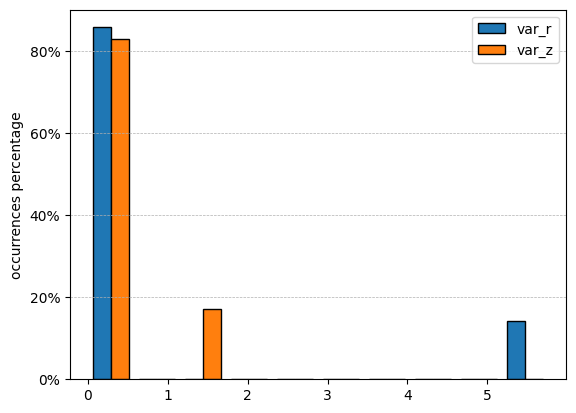

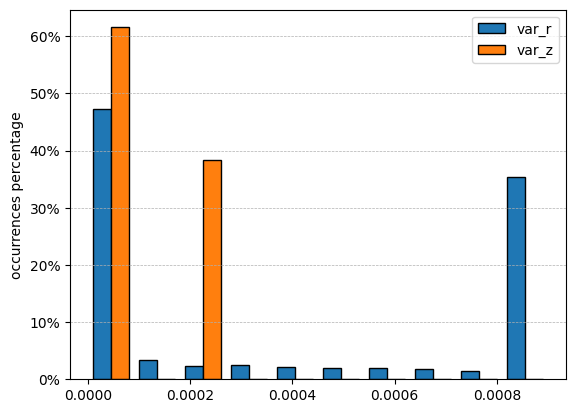

In [17]:
plot_multiple_histograms(spacepoints_df, ['var_r', 'var_z'])
filter = (spacepoints_df['var_r'] < 1) & (spacepoints_df['var_z'] < 1)
plot_multiple_histograms(spacepoints_df[filter], ['var_r', 'var_z'])
# filter = (spacepoints_df['var_r'] < 1e-10) & (spacepoints_df['var_z'] < 1e-10)
# plot_multiple_histograms(spacepoints_df[filter], ['var_r', 'var_z'])

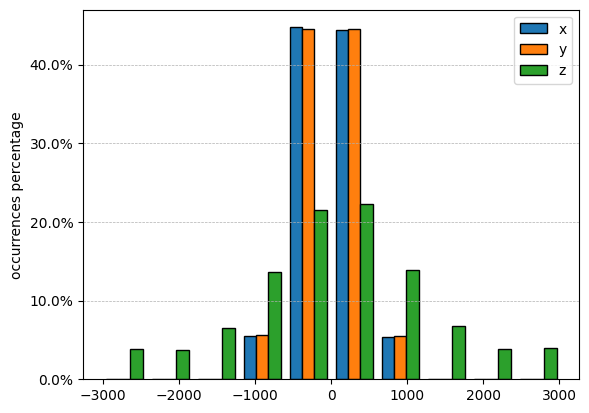

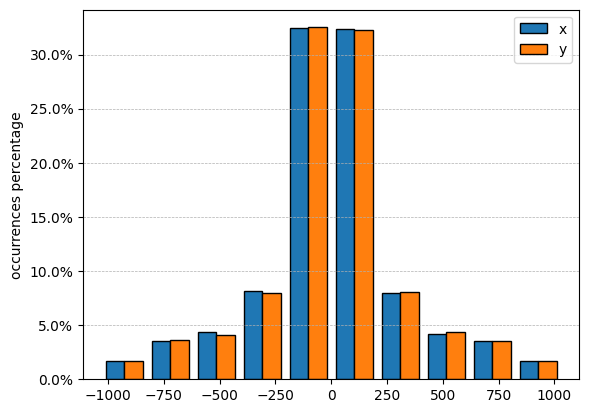

In [18]:
plot_multiple_histograms(spacepoints_df, ['x', 'y', 'z'])
plot_multiple_histograms(spacepoints_df, ['x', 'y'])
# plot_multiple_histograms(spacepoints_df, ['var_r', 'var_z'])

## particles_initial.csv

In [19]:
import numpy as np
import pandas as pd
particles_initial_df = pd.read_csv('./ODD_Single_muon_10k/particles_initial.csv')

--- phi stats ---
min(phi): -3.140700101852417
max(phi): 3.140698194503784
avg(phi): 0.0013893412496399833
med(phi): -0.00204195082187645


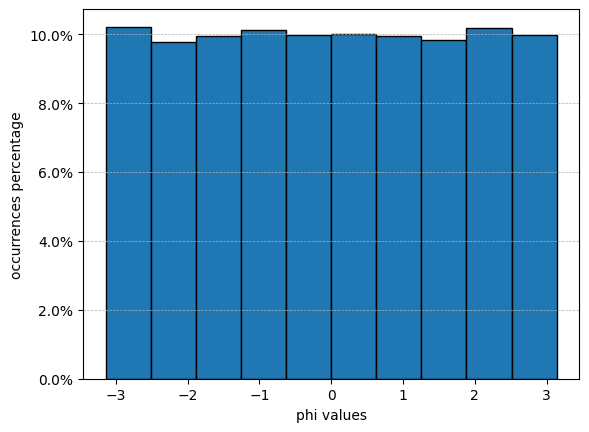

In [20]:
print_basic_stats(particles_initial_df, 'phi')
plot_histogram(particles_initial_df, 'phi')

--- pt stats ---
min(pt): 1.0008341073989868
max(pt): 9.99747371673584
avg(pt): 5.4773865018248555
med(pt): 5.432232618331909


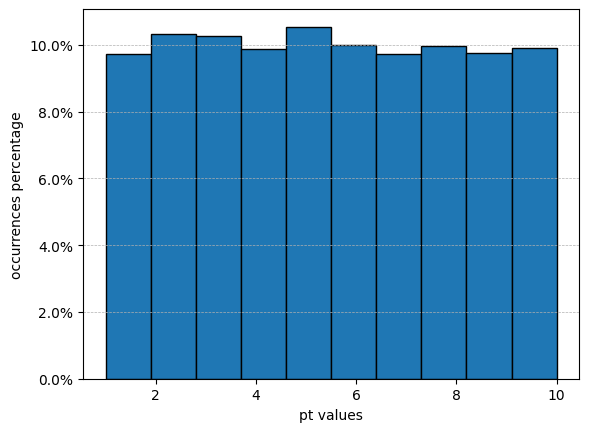

In [21]:
print_basic_stats(particles_initial_df, 'pt')
plot_histogram(particles_initial_df, 'pt')

--- q stats ---
min(q): -1.0
max(q): 1.0
avg(q): 0.0014
med(q): 1.0


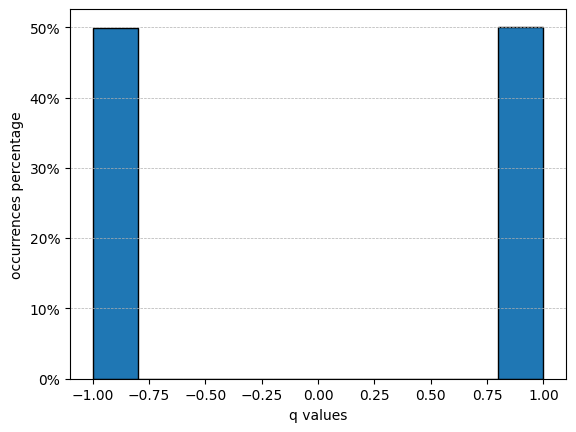

In [22]:
print_basic_stats(particles_initial_df, 'q')
plot_histogram(particles_initial_df, 'q')